# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing libraries and data

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [113]:
# Establishing a path
path = r'/Users/Kate/Documents/Chocolate Bar Ratings Analysis'

In [114]:
# Importing data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_cleaned2.csv'), index_col=0)

In [115]:
df.head()

,Company,Review Date,Cocoa Percent,Company Location,Rating,Broad Origin,Cocoa category
0,A. Morin,2016,0.63,France,3.75,Sao Tome,Low Cocoa Mass
1,A. Morin,2015,0.70,France,2.75,Togo,Medium Cocoa Mass
2,A. Morin,2015,0.70,France,3.00,Togo,Medium Cocoa Mass
3,A. Morin,2015,0.70,France,3.50,Togo,Medium Cocoa Mass
4,A. Morin,2015,0.70,France,3.50,Peru,Medium Cocoa Mass


### 2. Subsetting, wrangling, and cleaning time-series data

In [116]:
# Create a subset with just 'Review Date', 'Cocoa Percent', and 'Rating' columns
subset = df.loc[:, ['Review Date', 'Cocoa Percent', 'Rating']]

In [117]:
subset.head()

,Review Date,Cocoa Percent,Rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50


In [118]:
# convert the 'Review Date' column to a datetime dtype and set it as the index of the dataframe, while dropping the original 'Review Date' column.
subset['datetime'] = pd.to_datetime(subset['Review Date'].astype(str)).dt.strftime('%Y')
subset = subset.set_index('datetime')
subset.drop(['Review Date'], axis=1, inplace=True)

In [119]:
subset.head()

,Cocoa Percent,Rating
datetime,,
2016,0.63,3.75
2015,0.70,2.75
2015,0.70,3.00
2015,0.70,3.50
2015,0.70,3.50


In [120]:
subset.columns

Index(['Cocoa Percent', 'Rating'], dtype='object')

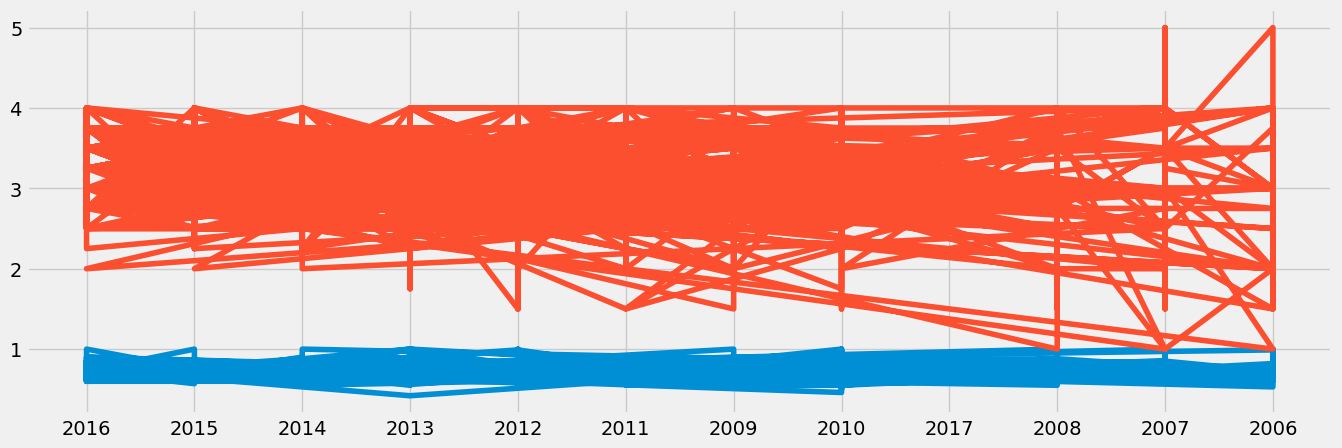

In [121]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(subset)

In [122]:
print(subset.index)

Index(['2016', '2015', '2015', '2015', '2015', '2014', '2014', '2014', '2014',
       '2014',
       ...
       '2012', '2012', '2012', '2012', '2012', '2011', '2011', '2011', '2011',
       '2010'],
      dtype='object', name='datetime', length=1795)


In [125]:
subset.index = pd.to_datetime(subset.index, format='%Y')

In [126]:
# Group the ratings by year and calculate the mean for each year
mean_rating = subset['Rating'].resample('Y').mean()

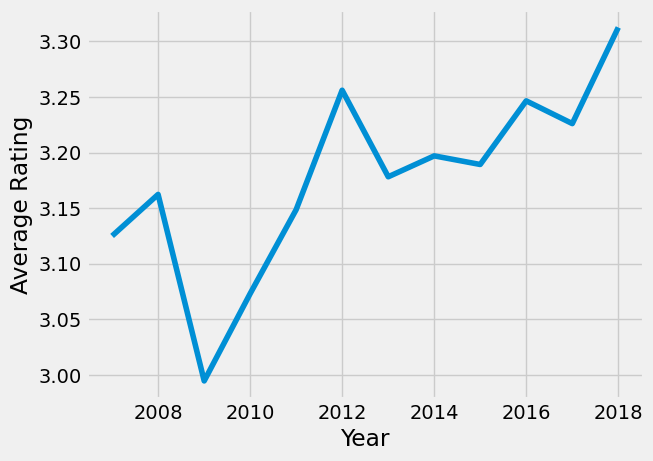

In [127]:
# Plot the time series
plt.plot(mean_rating)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

Text(0.5, 1.0, 'Mean Chocolate Rating Over Time')

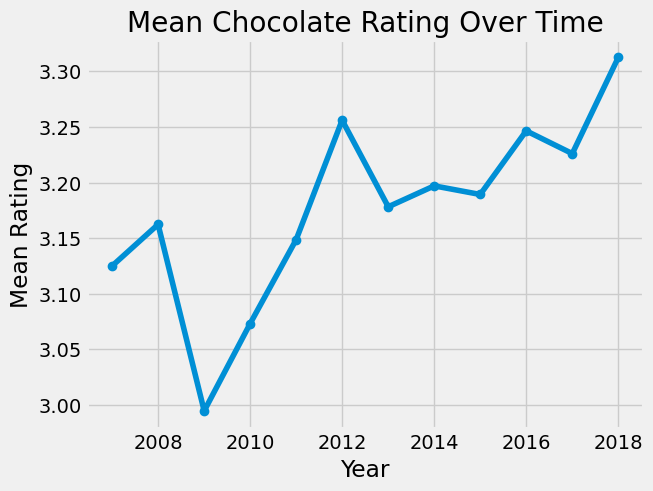

In [128]:
# Create a line plot of the mean rating over time using seaborn
plt.plot(mean_rating.index, mean_rating.values, '-o')

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.title('Mean Chocolate Rating Over Time')

In [124]:
subset.head()

,Cocoa Percent,Rating
datetime,,
2016,0.63,3.75
2015,0.70,2.75
2015,0.70,3.00
2015,0.70,3.50
2015,0.70,3.50


In [131]:
# Check for missing values
subset.isnull().sum() 

Cocoa Percent    0
Rating           0
dtype: int64

### 3. Time-series analysis: decomposition

In [130]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(mean_rating, model='additive')

In [132]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

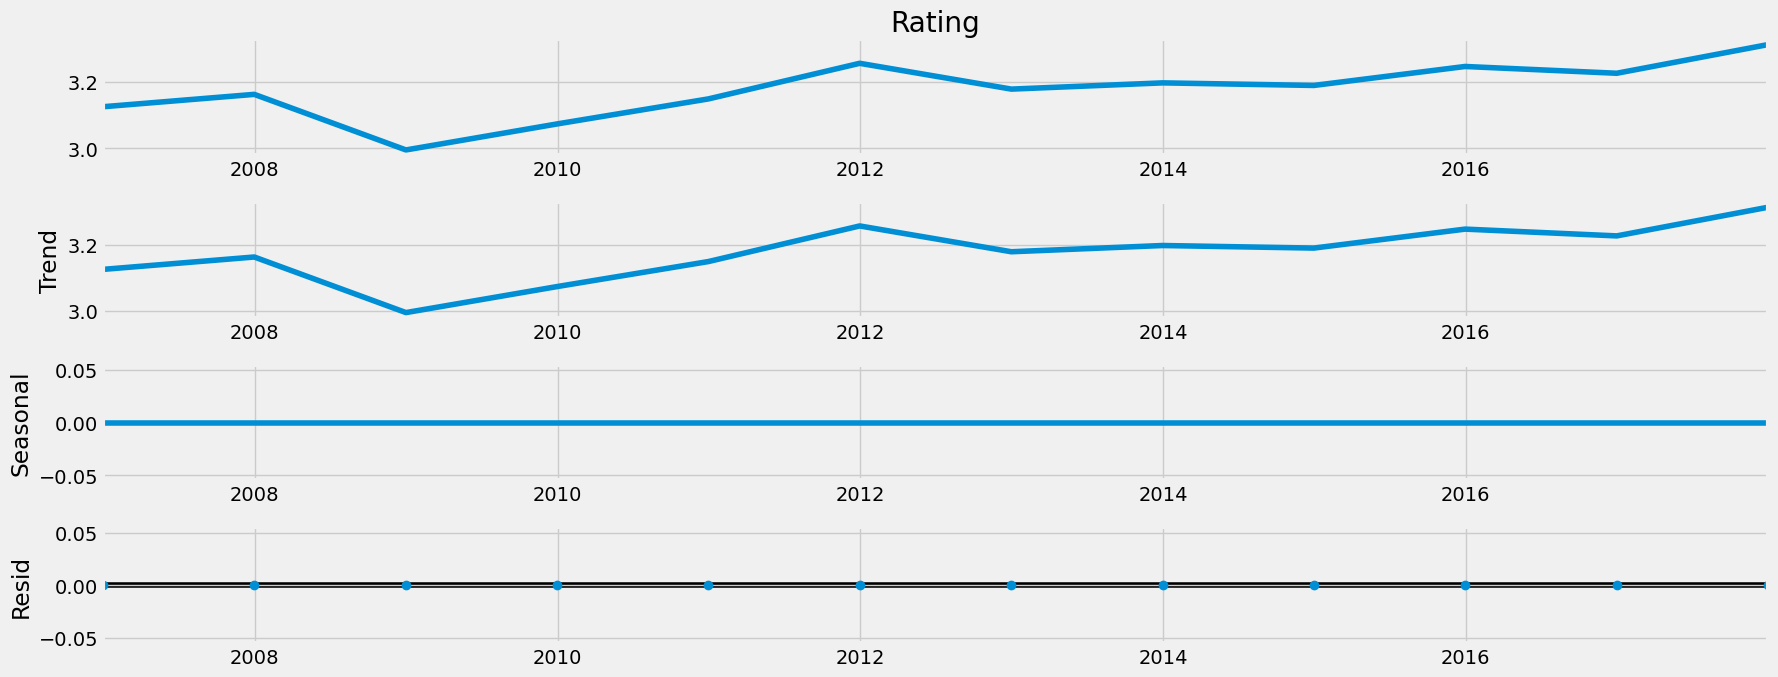

In [133]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [134]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(subset['Rating'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.654759e+01
p-value                        1.958247e-29
Number of Lags Used            3.000000e+00
Number of Observations Used    1.791000e+03
Critical Value (1%)           -3.434006e+00
Critical Value (5%)           -2.863155e+00
Critical Value (10%)          -2.567630e+00
dtype: float64


The p-value is very small (1.958247e-29), which suggests that the data is stationarity.

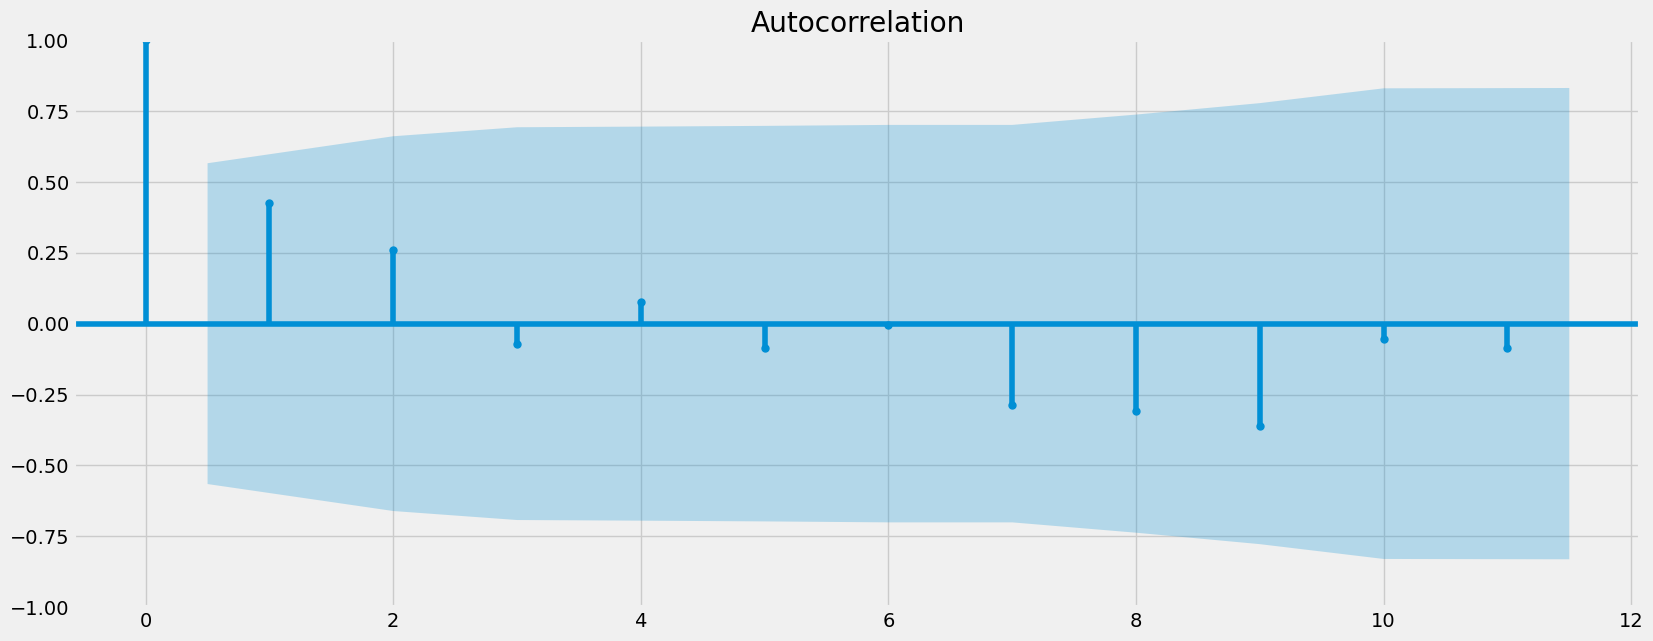

In [138]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf

# Create the ACF plot
plot_acf(mean_rating,)

# Show the plot
plt.show()

The data is stationary.